In [14]:
# %run dataset.ipynb

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
import glob
dir_ = Path('C:/Users/dydql/Deep_Learning/gan_animalface')
filepaths = list(dir_.glob(r'**/*.jpg'))
def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기 
    """

    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

df = proc_img(filepaths)
df.head(5)

,Filepath,Label
0,C:\Users\dydql\Deep_Learning\gan_animalface\ra...,rabbit_face
1,C:\Users\dydql\Deep_Learning\gan_animalface\be...,bear_face
2,C:\Users\dydql\Deep_Learning\gan_animalface\di...,dinosaur_face
3,C:\Users\dydql\Deep_Learning\gan_animalface\ra...,rabbit_face
4,C:\Users\dydql\Deep_Learning\gan_animalface\be...,bear_face


In [6]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 2215

Number of different labels: 5

Labels: ['rabbit_face' 'bear_face' 'dinosaur_face' 'cat_face' 'dog_face']


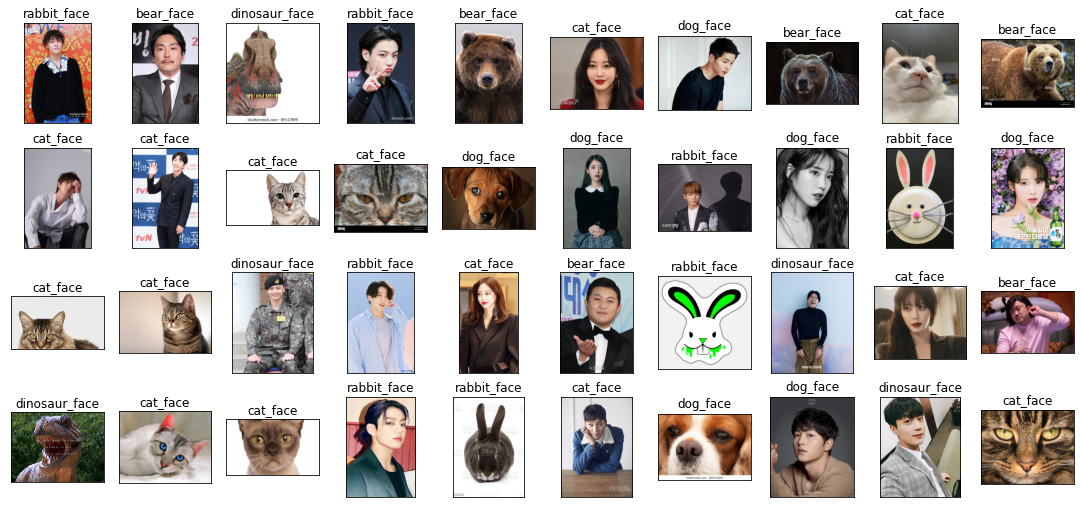

In [52]:
# 데이터 확인
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

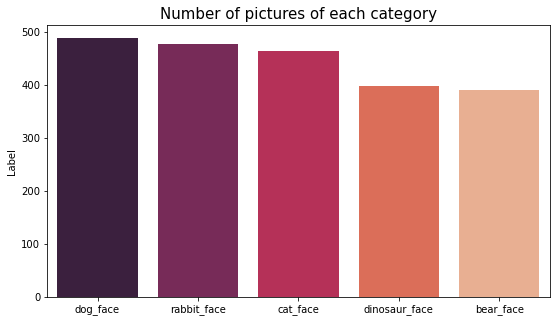

In [7]:
import seaborn as sns
vc = df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
# Training/test split
# train_df,test_df = train_test_split(df.sample(frac=0.2), test_size=0.1,random_state=0) #모델링 시간이 오래걸리면 사용
train_df,test_df = train_test_split(df, test_size=0.1,random_state=0)
train_df.shape,test_df.shape

((1993, 2), (222, 2))

In [16]:
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_directory('gan_animalface',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('gan_animalface',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 1775 images belonging to 5 classes.
Found 441 images belonging to 5 classes.


In [17]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [18]:
cnn.fit(x = train_gen, validation_data = val_gen, epochs = 10)

Epoch 1/10
56/56 [==============================] - 54s 947ms/step - loss: 1.6877 - accuracy: 0.2090 - val_loss: 1.5771 - val_accuracy: 0.2971
Epoch 2/10
56/56 [==============================] - 49s 874ms/step - loss: 1.4780 - accuracy: 0.3887 - val_loss: 1.4692 - val_accuracy: 0.3560
Epoch 3/10
56/56 [==============================] - 57s 1s/step - loss: 1.0774 - accuracy: 0.6023 - val_loss: 1.5477 - val_accuracy: 0.3991
Epoch 4/10
56/56 [==============================] - 51s 906ms/step - loss: 0.5427 - accuracy: 0.8146 - val_loss: 1.8825 - val_accuracy: 0.4036
Epoch 5/10
56/56 [==============================] - 50s 887ms/step - loss: 0.2169 - accuracy: 0.9465 - val_loss: 2.6237 - val_accuracy: 0.4014
Epoch 6/10
56/56 [==============================] - 51s 900ms/step - loss: 0.0611 - accuracy: 0.9893 - val_loss: 2.8148 - val_accuracy: 0.3878
Epoch 7/10
56/56 [==============================] - 49s 864ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 3.1897 - val_accuracy: 0.4218
Ep

In [19]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='categorical', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,val_images,test_images

In [25]:
def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}
    
    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.
    
    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
    # 라벨 개수가 5개이기 때문에 Dencs도 5로 설정
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [26]:
train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.DenseNet201)
history = model.fit(train_images,validation_data=val_images,epochs=7)

Found 1794 validated image filenames belonging to 5 classes.
Found 199 validated image filenames belonging to 5 classes.
Found 222 validated image filenames belonging to 5 classes.
Epoch 1/7
57/57 [==============================] - 403s 7s/step - loss: 1.0572 - accuracy: 0.5691 - val_loss: 0.7972 - val_accuracy: 0.6633
Epoch 2/7
57/57 [==============================] - 376s 7s/step - loss: 0.7618 - accuracy: 0.6784 - val_loss: 0.7526 - val_accuracy: 0.6432
Epoch 3/7
57/57 [==============================] - 372s 7s/step - loss: 0.5939 - accuracy: 0.7648 - val_loss: 0.7290 - val_accuracy: 0.7035
Epoch 4/7
57/57 [==============================] - 374s 7s/step - loss: 0.5011 - accuracy: 0.7965 - val_loss: 0.7687 - val_accuracy: 0.7136
Epoch 5/7
57/57 [==============================] - 373s 7s/step - loss: 0.4732 - accuracy: 0.8177 - val_loss: 0.8636 - val_accuracy: 0.6482
Epoch 6/7
57/57 [==============================] - 376s 7s/step - loss: 0.3626 - accuracy: 0.8763 - val_loss: 0.7984 - 

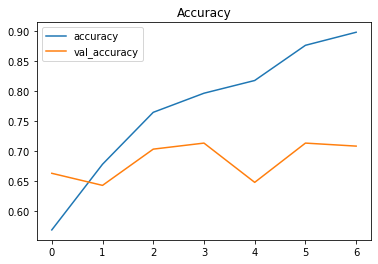

In [27]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

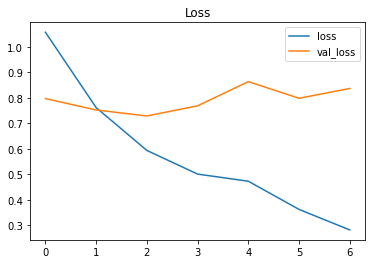

In [28]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
    
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

Accuracy on the test set: 69.82%


In [30]:
train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.ResNet152V2)
history = model.fit(train_images,validation_data=val_images,epochs=5)

Found 1794 validated image filenames belonging to 5 classes.
Found 199 validated image filenames belonging to 5 classes.
Found 222 validated image filenames belonging to 5 classes.
234553344/234545216 [==============================] - 26s 0us/step
Epoch 1/5
57/57 [==============================] - 587s 10s/step - loss: 0.9906 - accuracy: 0.5870 - val_loss: 0.8021 - val_accuracy: 0.6332
Epoch 2/5
57/57 [==============================] - 543s 10s/step - loss: 0.6425 - accuracy: 0.7308 - val_loss: 0.7812 - val_accuracy: 0.6784
Epoch 3/5
57/57 [==============================] - 553s 10s/step - loss: 0.5133 - accuracy: 0.7899 - val_loss: 0.8570 - val_accuracy: 0.6935
Epoch 4/5
57/57 [==============================] - 549s 10s/step - loss: 0.3919 - accuracy: 0.8467 - val_loss: 0.8334 - val_accuracy: 0.7387
Epoch 5/5
57/57 [==============================] - 544s 10s/step - loss: 0.3109 - accuracy: 0.8930 - val_loss: 0.8773 - val_accuracy: 0.6935


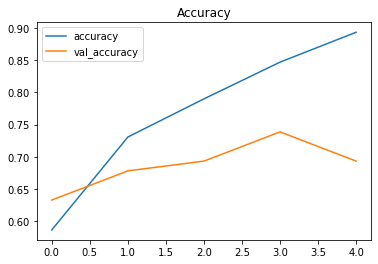

In [31]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

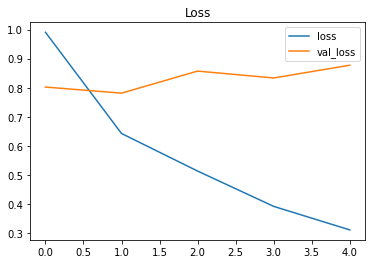

In [32]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [36]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# def printmd(string):
#     # Print with Markdowns    
#     display(Markdown(string))
    
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'# Accuracy on the test set: {acc * 100:.2f}%')

# Accuracy on the test set: 66.67%


In [38]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

               precision    recall  f1-score   support

    bear_face       0.77      0.95      0.85        38
     cat_face       0.62      0.77      0.69        43
dinosaur_face       0.62      0.44      0.52        45
     dog_face       0.60      0.58      0.59        45
  rabbit_face       0.70      0.65      0.67        51

     accuracy                           0.67       222
    macro avg       0.66      0.68      0.66       222
 weighted avg       0.66      0.67      0.66       222



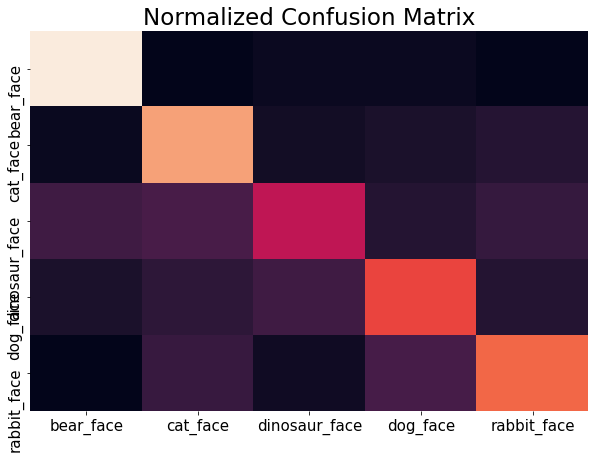

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=False, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

번호를 입력하세요 : 70
## 예측률 : 100.00%
### Class prediction = cat_face


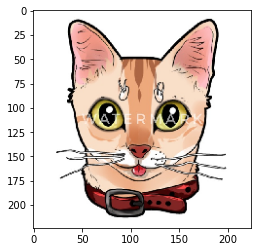

In [54]:
# from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
class_dictionary = {'bear_face': 0,
                    'cat_face': 1,
                    'dinosaur_face': 2,
                    'dog_face': 3,
                    'rabbit_face': 4}
IMAGE_SIZE    = (224, 224)
number_1 = int(input("번호를 입력하세요 : ")) # 10, 50, 100
test_image = image.load_img(test_df.iloc[number_1, 0]
                            ,target_size =IMAGE_SIZE )
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255.);

test_image = test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image = preprocess_input(test_image)
prediction = model.predict(test_image)

df = pd.DataFrame({'pred':prediction[0]})
df = df.sort_values(by='pred', ascending=False, na_position='first')
print(f"## 예측률 : {(df.iloc[0]['pred'])* 100:.2f}%")

for x in class_dictionary:
  if class_dictionary[x] == (df[df == df.iloc[0]].index[0]):
    print(f"### Class prediction = {x}")
    break